# PROBLEM STATEMENT

# Analyze and Present A/B Test Results

Facebook recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, HotelsForYou.com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.
In this A/B test, HotelsForYou.com randomly splits its audience into two equally sized groups, e.g. the test and the control group. A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”.
The A/B test has run for 1 month and HotelsForYou.com now expects you to analyze and present the results of this A/B test.
You should answer the following questions in your presentation:
1. How would you define the hypothesis of this A/B test?
2. Can we conclude statistically significant results?
3. Which statistical test did you use, and why?
4. Based on your answer to Question 2, what would be your recommendation to client?


### Appendix
Facebook Ad: An advertisement created by a business on Facebook that's served up to Facebook users. 

Impressions: The number of times an ad is displayed.

Reach: The number of unique people who saw an ad.

Website Clicks: The number of clicks on ad links directed to Advertiser’s website.

Website Click Through Rate: Number of Website Clicks / Number of Impressions x 100

Cost per Action: Spend / Number of Actions

Action: Can be any conversion event, such as Search, View Content, Add to Cart and Purchase. Conversion Rate: Number of Actions / Number of Website Clicks x 100

## Import Libraries

In [177]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import levene

## Load Data Sets

In [178]:
# Data set loading
xls = pd.ExcelFile('Data_Science_Case_Study.xlsx')
# A Facebook ad campaign with “maximum bidding” is served to “control group” 
control = pd.read_excel(xls, 'Control_Group')
# A Facebook ad campaign with “average bidding” is served to the “test group”
test = pd.read_excel(xls, 'Test_Group') 

# Correction of structural disorders in columns
control.columns = ['Campaign_Name', 'Date', 'Spend', 'Impressions', 'Reach',
       'Website_Clicks', 'Searches', 'View_Content','Add_to_Cart', 'Purchase']
test.columns = ['Campaign_Name', 'Date', 'Spend', 'Impressions', 'Reach',
       'Website_Clicks', 'Searches', 'View_Content','Add_to_Cart', 'Purchase']

# Data Analysis and Pre-Processing

### Control Group

In [179]:
# Data set of the Control Group
control.head()

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [180]:
# A = Purchase  of the control grup
A = control.Purchase

In [181]:
# Sum of NaN values in Control Group
A.isna().sum()

3

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


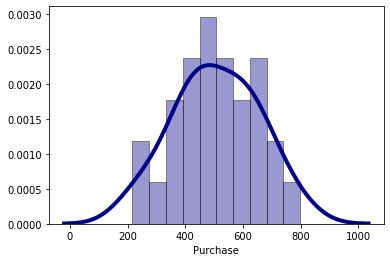

In [182]:
# Density Plot and Histogram of  Purchaser in Control group
sns.distplot(A, hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

When we look at the distribution of control_purchase values, it is seen that it has a normal distribution. For this reason, filling the NaN values ​​with control_purchase in mean value may be a logical method.

In [183]:
# Filling the NaN values in control_purchase
A.fillna(A.mean(), inplace= True)

### Test Group

In [184]:
# Data set of the Test Group
test.head()

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [185]:
# B = Purchase of the Test grup
B = test.Purchase

In [186]:
# Sum of NaN values in Test Group
B.isna().sum()

0

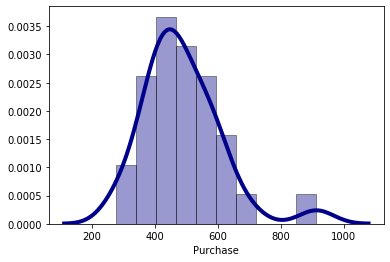

In [187]:
# Density Plot and Histogram of  Purchaser in Test group
sns.distplot(B, hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

As it can be seen from above histogram the Purchase values of Test group doesnot have normal distribution. 


## Independent Two Sample T - Test (AB Test)


Here we need to use two independent samples AB test, since two different groups are tested and an evaluation is made between them.

My hypothesis is like that:

Ho: Our hypothesis is that there is no significant difference between the control group and the purchase of the test group.


H1: Our hypothesis is that there is a significant difference between the control group and the purchase of the test group.

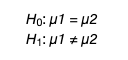



In [188]:
# lenght of the Control group sample(A) and Test group sample(B)
len(A), len(B)

(32, 30)

### Rearranging Data Sets for T-test

In [189]:
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)


GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)


AB = pd.concat([A,B])
AB.columns = ["purchase","GRUP"]
print(AB.head())
print(AB.tail())

   purchase GRUP
0     383.0    A
1     644.0    A
2     639.0    A
3     649.0    A
4     455.0    A
    purchase GRUP
25     277.0    B
26     450.0    B
27     479.0    B
28     472.0    B
29     369.0    B


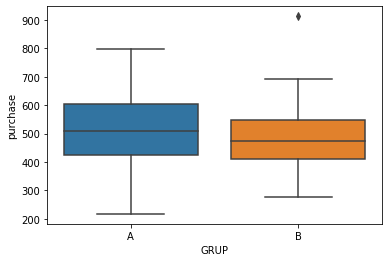

In [190]:
# Here we create a box-plot to examine the distributions of the two groups.
sns.boxplot(x = "GRUP", y = "purchase", data = AB);

As you can see from the box-plot, the average purchase of group A is higher than that of group B. But we don't know if this is random. So we will test to find out whether it is statistically significant or not.

## Independent Two Sample T - Test Assumption Controls (AB Test)

If groups A and B provide the following two assumptions, the Parametric Independent Two-Sample T-Test, which is given below, is applied to these groups and it is decided whether the hypothesis will be rejected or not.

* Normality Test(Shapiro Test)
* Variance Homogeneity Distribution

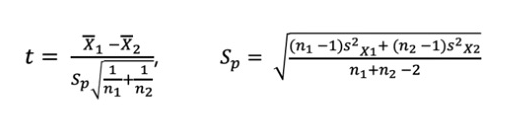



If one of these assumptions cannot be achieved, then the Non-Parametric Independent Two Sample T-Test, mannwhitneyu test, is applied.

###  Normality Test (Shapiro Test)


In [191]:
# Shapiro Test of Control Group
shapiro(A.Purchase)

(0.9902392625808716, 0.9900830388069153)

**Since P-value = 0.99008 is greater than alpha = 0.05, it is said to have a normal distribution and CONTROL GROUP achieved condition. So it has a normal distribution.**

In [192]:
# Shapiro Test of Test Group
shapiro(B.Purchase)

(0.9188652038574219, 0.02506561577320099)

**Since P-value = 0.02506 is NOT greater than alpha = 0.05, it is said to not have a normal distribution and TEST GROUP cannot achieved condition. So it sdoesnot have a normal distribution.**

### Variance Homogeneity Distribution
We use levene test to check whether the groups have variance homogeneity or not.

Hypothesis:

Ho: Variances are homogeneous

H1: Variances are not homogeneous. 


In [193]:
# Levene Test 
levene(A.Purchase, B.Purchase)

LeveneResult(statistic=0.7785891893310539, pvalue=0.38109449099609716)

In [194]:
print("Levene Statistics: " + str(levene(A.Purchase, B.Purchase)[0]))
print("Calculated P-value: " + str(levene(A.Purchase, B.Purchase)[1]))

Levene Statistics: 0.7785891893310539
Calculated P-value: 0.38109449099609716


**Since the P-value = 0.381094 value is greater than alpha = 0.05, the Ho hypothesis is not rejected, so the variances are called homogeneous.**



### Hypothesis Testing (Non-Parametric Independent Two Sample T-Test)

While the assumption of variance homogeneity, which is one of the assumption tests, provides the condition, the normal distribution assumption could not be achieved. The Non-Parametric test that should be applied in this case is the **mannwhitneyu test**.

In [195]:
# Mannwhitneyu Test
from scipy.stats import mannwhitneyu
mannwhitneyu(A.Purchase, B.Purchase)

MannwhitneyuResult(statistic=413.0, pvalue=0.17441678204651884)

In [196]:
test_statistics, pvalue = mannwhitneyu(A.Purchase, B.Purchase)
print('Test statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Test statistics = 413.0000, p-value = 0.1744


## Conclusion

Since pvalue = 0.1744 is greater than alpha = 0.05, there is NO SIGNIFICANT DIFFERENCE between Purchase values of Control and Test groups.


**So the Ho: µ1 = µ2 hypothesis, which says there is no difference, is not rejected.**